# Time Series

### Zhentao Shi


<img src="graph/yellowriver.jpg" width="1000">


In [1]:
library(tidyverse)
library(zoo)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




* Practical topics
* Useful in business contexts
* Modeling choices and challenges

* Time Series Regression
* Univariate Time Series Models
* Nonstationary Time Series
* Multivariate Time Series

* Traditionally, small models
* High dimensional time series modeling is work in progress
* Predictive regression

### Stationary Time Series

For a univariate time series $(y_t)_{t= - \infty} ^ {\infty}$,
* **Strictly stationary**: joint distribution of any finite coordinate only depends on their relative position.
* **Weakly stationary**: the first two moments of any pair $y_t$ and $y_s$ only depends on their relative position.
    * $E[y_t] = \mu$ for all $t$
    * $\mathrm{var}[y_t] = \sigma^2$ for all $t$
    * $\mathrm{cov}[y_t, y_{t+\tau} ] $ only depends on $\tau$ independent of $t$


This notions can be extended to multiple-variate time series, for example $(y_t, x_t, e_t)$.

### Two Operations

* Lag Operator

$$L x_t = x_{t-1}$$
$$L^{\tau} x_t = x_{t-\tau}$$ 

* Difference operator
$$\Delta x_t = x_t - x_{t-1} = (1-L) x_t$$

### Distributed Lags

* Lagged $x$ on the right-hand side

$$
y_t = \alpha + \sum_{i=0}^{\infty} \beta_i  x_{t-i} + e_t = \alpha + B(L) x_t + e_t 
$$

where $$B(L) = \sum_{i=0}^{\infty} \beta_i L^i$$ is a polynomial of the lag operators.

## Autoregressive model

* Lagged $y$ on the right-hand side

$$
y_t = \alpha + \sum_{i=1}^p \gamma_p y_{t-p} + e_t 
$$ 

can be written as 
$
C(L) y_t = \alpha + e_t
$
where 
$
C(L) = 1 -\gamma_1 L - \cdots - \gamma_p L^p
$
is a polynomial of the lag operators.

## Invertibility

If the roots of the polynomial equation $C(z) = 0$ **all** lies **outside** of the unit circle, we say the autoregressive model is invertible.



If $e_t$ is stationary with finite variance and $\alpha=0$ (homogenous difference equation):
* If the module of the smallest root is bigger than 1, $y_t$ is a stationary time series
* If the module of the smallest root is equal to 1, $y_t$ is a **unit root** process
* If the module of the smallest root is smaller than 1, $y_t$ is an **explosive** process


### Numerical Example

* $C(L) = 1 - 0.5L$ is invertible.
* $C(L) = 1 - L$ is non-invertible.
* $C(L) = 1 - 1.1L$ is non-invertible.

In [3]:
AR = function(b,T){
    y = rep(0,T)
    for (t in 1:T){
        if (t > 1) {
            y[t] = b * y[t - 1] + rnorm(1)
        }
    }
    return(ts(y) )
}

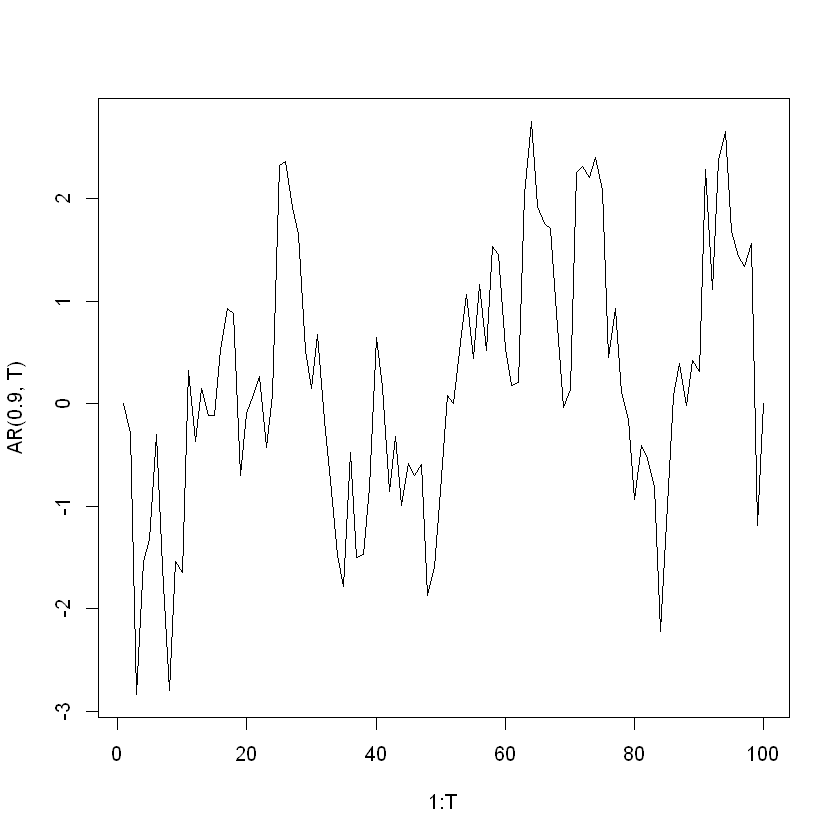

In [16]:
T = 100; plot( x = 1:T, y = AR(0.9, T), type = "l")

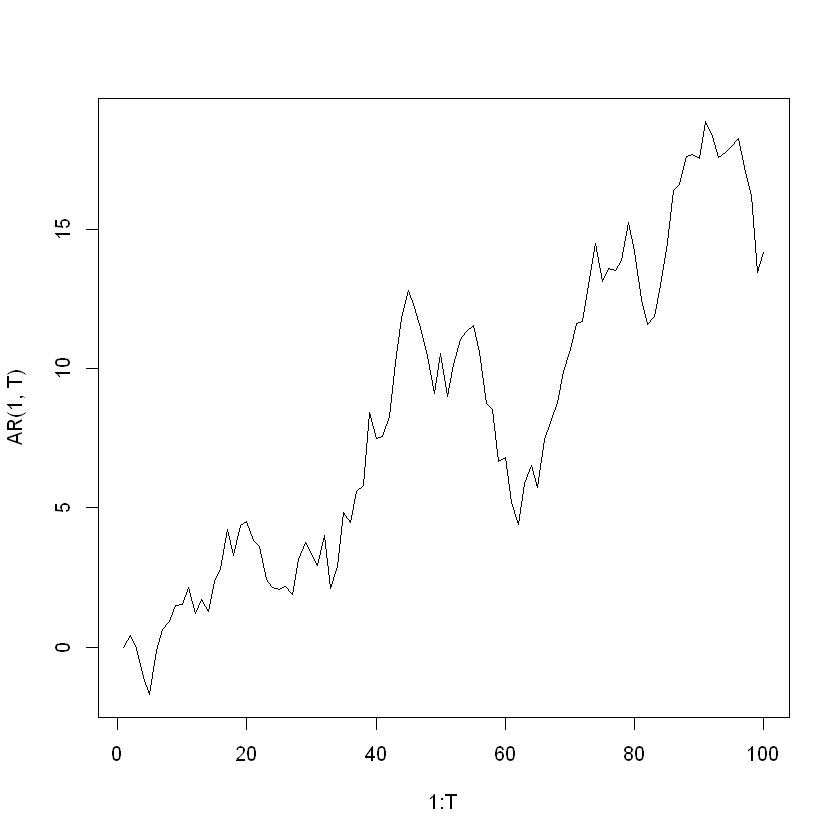

In [24]:
T = 100; plot( x = 1:T, y = AR(1.0, T), type = "l")

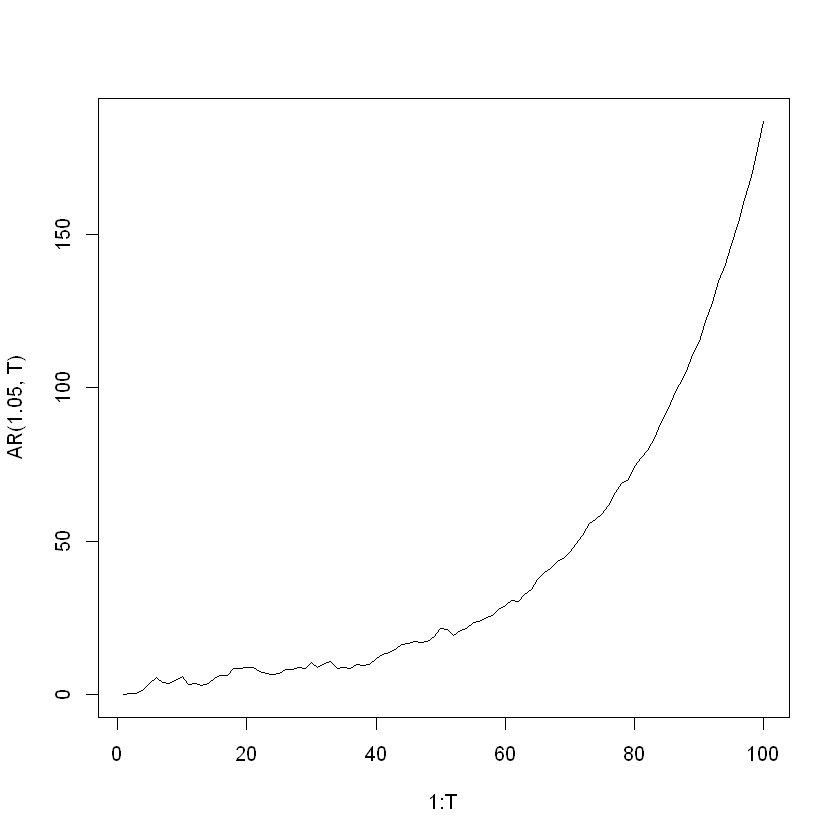

In [37]:
T = 100; plot( x = 1:T, y = AR(1.05,T), type = "l")

### Autoregressive Distributed Lag Models


* ARDL(p,r) model:

$$
C(L) y_t = \mu + B(L) x_t + e_t 
$$ 

where 
$
C(L) = 1 -\gamma_1 L - \cdots - \gamma_p L^p
$
and 
$
B(L) =  \beta_0 + \beta_1 L + \cdots + \beta_r L^r.
$

* **Granger causality**: 

$$
\beta_0 = \beta_1 = \cdots = \beta_r = 0
$$

### Example

* In simple regression form

$$
y_t = \beta_1 + \beta_2 x_t + \beta_3 x_{t-1} + \gamma y_{t-1} + e_t
$$

* Temporal lags of effect. eg: policy lag
* Expectation formed from the past. eg: forecast
* Explicitly depends on history. eg: wealth accumulation


In [38]:
quantmod::getSymbols.FRED(Symbols = "POILBREUSDQ", env = .GlobalEnv) # Brent Oil price
quantmod::getSymbols.FRED(Symbols = "IPB50001SQ", env = .GlobalEnv) # industrial Index (quarterly data)

d0<- merge(POILBREUSDQ, IPB50001SQ, retclass = "data.frame") %>% 
  dplyr::filter(!is.na(POILBREUSDQ)) %>%
  mutate( x = ts(POILBREUSDQ), y = ts(IPB50001SQ))

rm(POILBREUSDQ, IPB50001SQ)
print(head(d0))


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



[1] "POILBREUSDQ"

[1] "IPB50001SQ"

           POILBREUSDQ IPB50001SQ        x       y
1990-01-01    19.71918    62.1205 19.71918 62.1205
1990-04-01    16.38344    62.5537 16.38344 62.5537
1990-07-01    26.35708    62.8073 26.35708 62.8073
1990-10-01    32.36676    61.8423 32.36676 61.8423
1991-01-01    20.94640    60.6841 20.94640 60.6841
1991-04-01    18.90951    61.0313 18.90951 61.0313


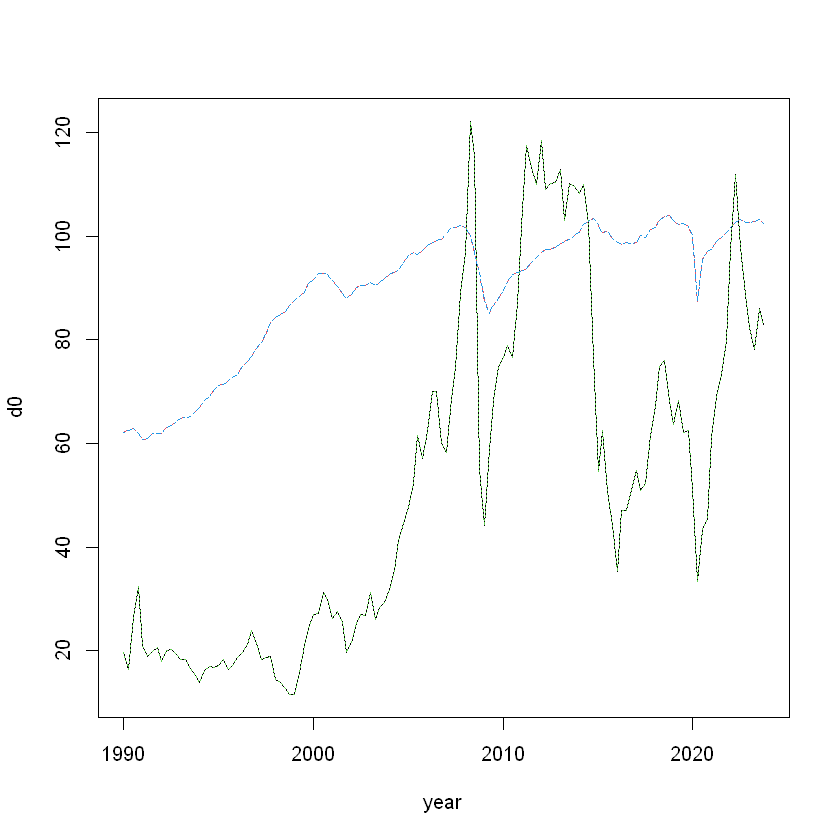

In [39]:
matplot(y = d0, 
        x = as.Date(row.names(d0), "%Y-%m-%d"), 
        main = "", type = "l", xlab = "year")

### ARDL(1,1) regression example

* `dynlm` only works with objects `ts()`. The transformation is essential

In [41]:
dynlm::dynlm( y ~ L(y, 1:3 ) + L(x,c(1:12) ), data = d0 )  %>%
      summary( )


Time series regression with "ts" data:
Start = 13, End = 136

Call:
dynlm::dynlm(formula = y ~ L(y, 1:3) + L(x, c(1:12)), data = d0)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.9289  -0.4851   0.1585   0.6315   7.9596 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      3.745508   1.633991   2.292  0.02383 *  
L(y, 1:3)1       0.930522   0.101662   9.153 3.92e-15 ***
L(y, 1:3)2       0.138959   0.137674   1.009  0.31507    
L(y, 1:3)3      -0.107900   0.099370  -1.086  0.27996    
L(x, c(1:12))1   0.059423   0.019590   3.033  0.00303 ** 
L(x, c(1:12))2  -0.080189   0.030919  -2.594  0.01082 *  
L(x, c(1:12))3   0.033074   0.032643   1.013  0.31323    
L(x, c(1:12))4  -0.037977   0.032844  -1.156  0.25011    
L(x, c(1:12))5   0.028097   0.032505   0.864  0.38930    
L(x, c(1:12))6  -0.004879   0.032642  -0.149  0.88146    
L(x, c(1:12))7  -0.010551   0.032943  -0.320  0.74938    
L(x, c(1:12))8   0.009936   0.032810   0.303  0.762

* Differenced dependent variable (`d( )`)

In [42]:
dynlm::dynlm( d(y) ~ L(y, c(1) ) + L(d(x),c(0:1) ), data = d0 )  %>%
      summary( )


Time series regression with "ts" data:
Start = 3, End = 136

Call:
dynlm::dynlm(formula = d(y) ~ L(y, c(1)) + L(d(x), c(0:1)), data = d0)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.4030  -0.4350   0.1687   0.6970   7.9063 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       2.19087    0.94389   2.321 0.021838 *  
L(y, c(1))       -0.02158    0.01040  -2.076 0.039883 *  
L(d(x), c(0:1))0  0.06059    0.01529   3.962 0.000122 ***
L(d(x), c(0:1))1  0.03463    0.01529   2.265 0.025192 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.55 on 130 degrees of freedom
Multiple R-squared:  0.1959,	Adjusted R-squared:  0.1774 
F-statistic: 10.56 on 3 and 130 DF,  p-value: 2.914e-06


## Spurious Regression


* The two time series $\{y_t\}$ and $\{x_t\}$ are generated independently, so that $E[y_t|x_t] = 0$. 
* However, we observe a high $R^2$ and large t-value if we regression $y_t$ against $x_t$.


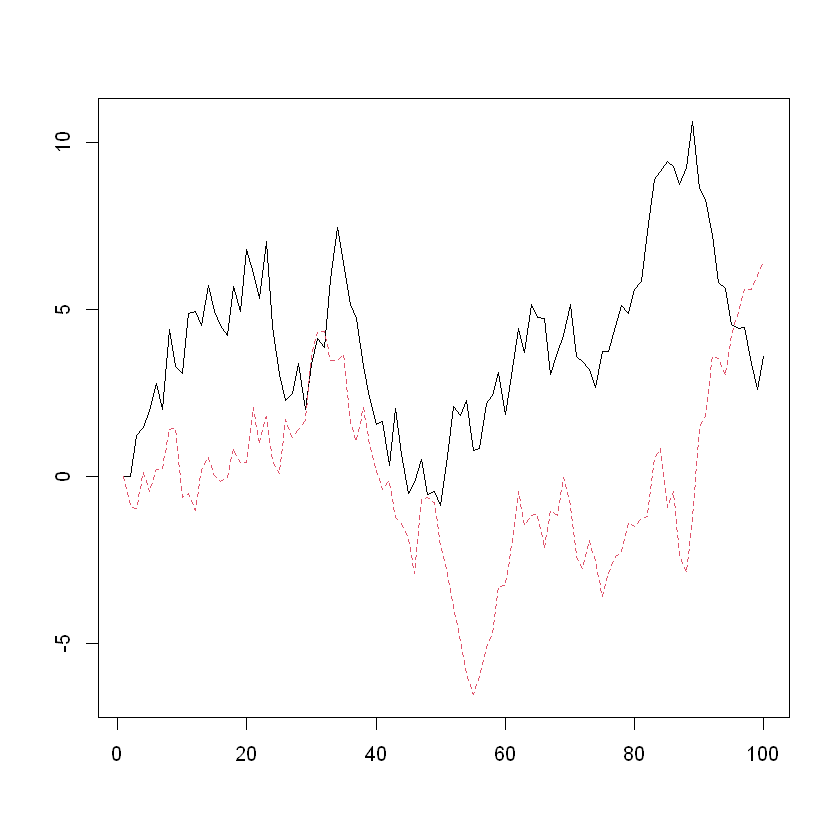

In [53]:
T = 100
a = 1

y <- AR(a, T)
x <- AR(a, T)
matplot( cbind(y, x), type = "l", ylab = "" )

In [54]:
reg <- lm(y ~ x)
summary(reg)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3903 -1.6439 -0.0098  1.2120  6.9436 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.99070    0.24380  16.369  < 2e-16 ***
x            0.25333    0.09241   2.741  0.00727 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.433 on 98 degrees of freedom
Multiple R-squared:  0.07122,	Adjusted R-squared:  0.06174 
F-statistic: 7.515 on 1 and 98 DF,  p-value: 0.007274


### Discovery

* Granger and Newbold (1974): If we naively use 1.96 as the critical value for the $t$-ratio, how often we would reject the null hypothesis that $\beta = 0$?  

* The nominal asymptotic test size is $5\%$ according to the standard asymptotic theory
* The empirical size is about 0.80 in this simulation
* The drastic deviation suggests that the standard asymptotic theory fails in the nonstationary environment


In [57]:
spurious <- function(i, a, T){
    y <- AR(a, T)
    x <- AR(a, T)
    
    reg <- lm(y ~ x)
    p.val <- summary(reg)[[4]][2,4]
    # save the p-value of the estimate of x's coefficient
    return(p.val)
}

out <- plyr::ldply(.data = 1:1000, .fun = spurious, a = 1.0 , T = 50)
print( mean(out < 0.05) )

[1] 0.683


### Autoregression and Moving Average

* Box-Jenkins (1976): ARMA
* No economic theory. For fitting and prediction only.

* Building block: **White noise**
    * $E[e_t] = 0$, $E[e_t^2] = \sigma_e^2$, and $E[e_t, e_s] = 0$ for all $t\neq s$. 

## ARMA


* AR(p): 
$
y_t = \mu + \gamma_1 y_{t-1} + \cdots +\gamma_p y_{t-p} + e_t
$

* MA(q):
$
y_t = \mu + e_t + \theta_1 e_{t-1} +  \cdots + \theta_q e_{t-q}
$

* ARMA(p,q):
$
(1-\Gamma(L) ) y_t = \mu + \Theta (L) e_t
$

Stationarity: in AR form whether all roots lies out of the unit cycle.

### Autocorrelation Patterns


* MA(q): finite dependence
* AR(1): geometric decline
    * $E[ y_t ] = \mu / (1-\gamma_1)$
    * $\mathrm{var}[y_t] = \sigma_e^2 / (1-\gamma_1^2 )$
    * $E[ y_t | y_{t-1} ] = \mu + \gamma_1 y_{t-1}$
    * $\mathrm{var}[y_t | y_{t-1} ] = \sigma_e^2 $
    


### Modeling

* ARIMA(p, r, q) $$(1-\Gamma(L) ) \Delta^r y_t = \mu + \Theta (L) e_t$$
* Transform into stationary time series by taking logarithm and/or difference.
* Fit ARMA(p,q)

In [58]:
reg1 <- arima(d0$x, order  = c(2,0, 3) )# arima(2,0,3)
print(reg1)
summary(reg1)


Call:
arima(x = d0$x, order = c(2, 0, 3))

Coefficients:
         ar1      ar2     ma1      ma2      ma3  intercept
      1.1838  -0.2159  0.1182  -0.2133  -0.0695    52.1003
s.e.  1.5312   1.4520  1.5291   0.5477   0.2183    16.1378

sigma^2 estimated as 69.86:  log likelihood = -483.18,  aic = 980.37


          Length Class  Mode     
coef        6    -none- numeric  
sigma2      1    -none- numeric  
var.coef   36    -none- numeric  
mask        6    -none- logical  
loglik      1    -none- numeric  
aic         1    -none- numeric  
arma        7    -none- numeric  
residuals 136    ts     numeric  
call        3    -none- call     
series      1    -none- character
code        1    -none- numeric  
n.cond      1    -none- numeric  
nobs        1    -none- numeric  
model      10    -none- list     

In [59]:
reg2 <- arima(d0$x, order  = c(2,1,3) ) # arima(2,1,3)
print(reg2$coef )

        ar1         ar2         ma1         ma2         ma3 
 0.35295749  0.27683872 -0.03914053 -0.55274666 -0.14263637 


### Seasonality

* Generated due to sampling frequency
  * [Traffic data](https://www.kaggle.com/datasets/fedesoriano/traffic-prediction-dataset)
  * [Electronic consumption](https://www.kaggle.com/datasets/utathya/electricity-consumption)
* Add dummies to control seasonality

### Estimation

* MLE for MA(q)
* MLE for ARMA(p,q)
* OLS for AR(p)

### Information criteria. 

Let $k$ be the total number of slope coefficient in the model.

* Akaike information criterion: $\log( \hat{\sigma}^2 ) + 2\times (k / T )$. 
    * Tend to overfit, but better for prediction
* Bayesian information criterion: $\log( \hat{\sigma}^2 ) + \log(T) \times (k / T )$
    * Model selection consistent

    
* Information criteria are not restricted to time series regressions. 
* They are general statistical measures for model/variable selection.

In [60]:
print( reg1$aic )
print( reg2$aic )

[1] 980.3668
[1] 970.4079


## Unit Root

* AR(1) with AR coefficient equals 1. $$y_t = \mu + y_{t-1} + e_t $$
* Nonstationary
* Brownian motion: normal innovation
* Random walk

### Implication
* conditional and unconditional mean
* conditional and unconditional variance
* $h$-period ahead forecast

### Distribution

The OLS estimator 

$$
T(\hat{\gamma}_1 - 1) \stackrel{d}{\to} \text{ a stable distribution}.
$$

but the asymptotic distribution is not normal. 

Warning message:
"package 'quantmod' was built under R version 4.3.2"
Warning message:
"package 'xts' was built under R version 4.3.2"

######################### Warning from 'xts' package ##########################
#                                                                             #
# The dplyr lag() function breaks how base R's lag() function is supposed to  #
# work, which breaks lag(my_xts). Calls to lag(my_xts) that you type or       #
# source() into this session won't work correctly.                            #
#                                                                             #
# Use stats::lag() to make sure you're not using dplyr::lag(), or you can add #
# conflictRules('dplyr', exclude = 'lag') to your .Rprofile to stop           #
# dplyr from breaking base R's lag() function.                                #
#                                                                             #
# Code in packages is not affected. It's protected by R's namesp

[1] "GSPC"

           GSPC.Close
2024-03-07    5157.36
2024-03-08    5123.69
2024-03-11    5117.94
2024-03-12    5175.27
2024-03-13    5165.31
2024-03-14    5150.48

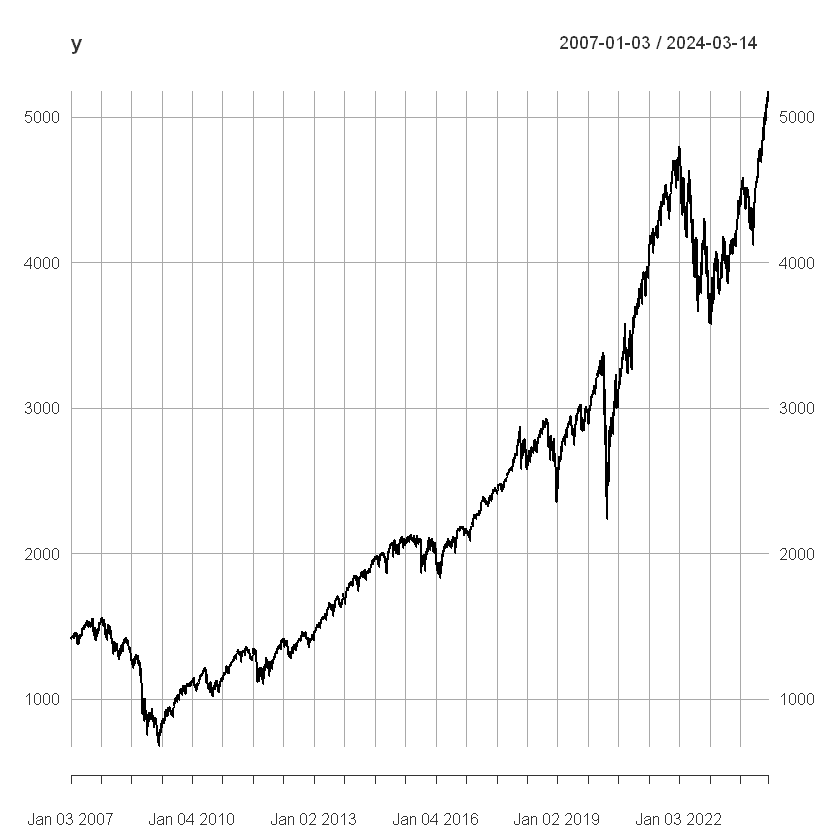

In [61]:
library(quantmod, quietly = TRUE)
getSymbols("^GSPC") # S&P 500

y = GSPC$GSPC.Close
plot(y, type = "l")

tail(y)

### Hypothesis Testing

* Null hypothesis: unit root.
$$ \Delta y_t = \mu + (\gamma_1 - 1 ) y_{t-1} + e_t = \mu+ \theta y_{t-1} + e_t$$
where $ \theta = \gamma_1 - 1 $. Under the null, $\theta = 0$.

* The $t$-statistic is the test statistic for the Dicky-Fuller test.
* Under the null, the $t$-statistic asymptotically follows a stable distribution.


### Numerical Example


* In this numerical example, the test does not reject the null.

Notice: the test is one-sided.

In [62]:
library(urca) # package for unit root and cointegration
print( summary(ur.df(y, type = "drift", lags = 0) ) ) # y here is the S&P 500 index
# the test does not reject the null of "unit root"
# loosely speaking, it is evidence in support of random walk

Warning message:
"package 'urca' was built under R version 4.3.3"



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1)

Residuals:
    Min      1Q  Median      3Q     Max 
-325.87   -9.71    0.55   10.85  229.47 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) 0.1278784  1.0099249   0.127    0.899
z.lag.1     0.0003151  0.0003898   0.808    0.419

Residual standard error: 28.95 on 4326 degrees of freedom
Multiple R-squared:  0.000151,	Adjusted R-squared:  -8.009e-05 
F-statistic: 0.6535 on 1 and 4326 DF,  p-value: 0.4189


Value of test-statistic is: 0.8084 2.2492 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.43 -2.86 -2.57
phi1  6.43  4.59  3.78



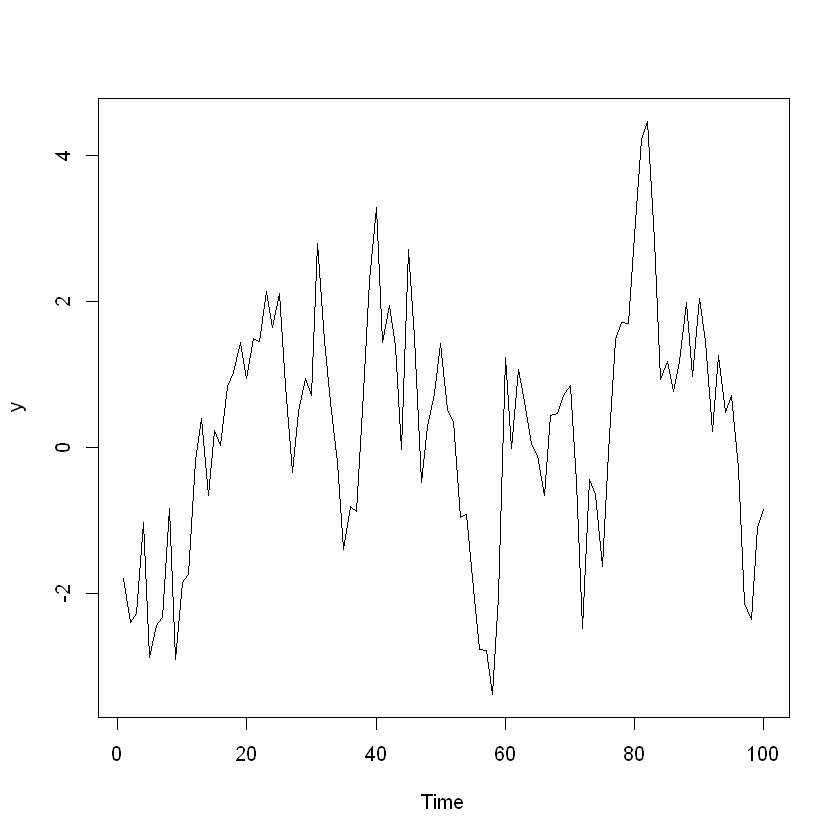

In [65]:
y = arima.sim( model = list(ar =.8), n = 100)
plot(y)


In [66]:
summary( urca::ur.df( y, type = "none", selectlags = "AIC" ) ) 


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.24973 -0.63894 -0.00593  0.75829  2.81482 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
z.lag.1    -0.23305    0.06809  -3.422 0.000913 ***
z.diff.lag -0.01064    0.10117  -0.105 0.916420    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.047 on 96 degrees of freedom
Multiple R-squared:  0.1228,	Adjusted R-squared:  0.1045 
F-statistic: 6.717 on 2 and 96 DF,  p-value: 0.001861


Value of test-statistic is: -3.4225 

Critical values for test statistics: 
     1pct  5pct 10pct
tau1 -2.6 -1.95 -1.61


### Simulation: Dicky-Fuller Distribution

In [67]:
library(dynlm)

DF.sim = function(ar){
  Rep = 500
  n = 100
  
  B.hat = rep(0, Rep)
  
  for (r in 1:Rep){
    if (ar < 1) {
      y = arima.sim( model = list(ar = ar), n = n)
    } else if (ar == 1){
      y = ts( cumsum( rnorm(n) ) )
    }
    reg.dyn = dynlm( y ~ L(y,1) )
    B.hat[r] = coef(reg.dyn)[2]
  }
  return(B.hat)
  print("simulation is done with ar = ", ar, "\n")
}

Warning message:
"package 'dynlm' was built under R version 4.3.2"


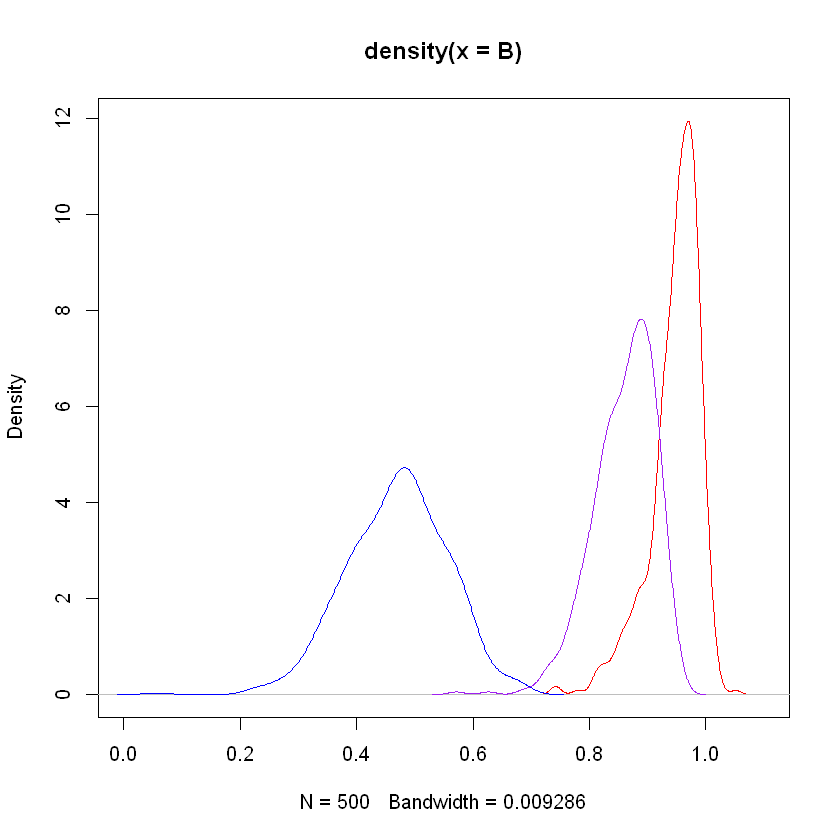

In [68]:
B = DF.sim(1)
plot(density(B), col = "red", xlim = c(0, 1.1))

B = DF.sim(0.5)
lines(density(B), col = "blue")

B = DF.sim(0.9)
lines( density(B), col = "purple" )

## Specification of DF test

* The error term must be a white noise for the DF distribution
* DF test's critical values vary with the specfication of drift and/or trend
* Augmented Dicky-Fuller test: add more differenced lag terms

## Other tests
* Phillips-Perron test
* KPSS test

In [ ]:
summary( urca::ur.pp( y ) )

In [ ]:
summary( urca::ur.kpss( y ) )

## Time Series Filtering

**Hodrick-Prescott filter**: Decompose a time series into *trend* and *cycle*

$$\hat{f}_{t}=\arg \min_{f_{t}}\left\{ \sum_{t=1}^{n}\left( y_{t}-f_{t}\right)^{2}+\lambda \sum_{t=3}^{n}\left( \Delta ^{2}f_{t}\right) ^{2}\right\}.$$
    
* The original paper (Hodrick Prescott, 1980, 1997) suggest $\lambda = 1600$ for quarterly data.
* $\lambda = 1600$ is also the base of adjustment for different time series data frequency.

* Phillips and Shi (2021)
* Mei, Phillips and Shi (2023)

In [ ]:
library(mFilter)
data(unemp)

unemp.hp <- hpfilter(unemp)
plot(unemp.hp)

## Cointegration

In a regression
$$y_t = \beta x_t  + e_t$$

* If $y_t$ and $x_t$ are I(1) series
* But a linear combination $e_t = y_t - \beta x_t $ is I(0)

then we say $y_t$ and $x_t$ are cointegrated.

In [ ]:
BTC <- quantmod::getSymbols("BTC-USD",auto.assign = FALSE, from = "2021-07-01")[,4]
plot(BTC)

ETH <- quantmod::getSymbols("ETH-USD",auto.assign = FALSE, from = "2021-07-01")[,4]
plot(ETH)

plot( x = as.vector(ETH), y = as.vector(BTC), type = "l")

In [ ]:
BTC <- as.vector(BTC)
ETH <- as.vector(ETH)

reg <- lm(BTC ~ -1 + ETH)
plot(residuals(reg), type = "l")
abline( h = 0, lty = 2)

In [ ]:
 urca::ur.df( residuals(reg), type = "none", selectlags = "AIC" )  %>% summary()

### Source of Cointegration

Common shock is the source of cointegration

For example, if $y_{1t} = \mu_1 + \beta_1 t + e_{1t}$ and $y_{2t} = \mu_2 + \beta_2 t + e_{2t}$, where $e_{1t}$ and $e_{2t}$ are two white noises, then the cointegration vector must be $(1,\theta)$ where $$\theta = - \beta_1 / \beta_2.$$ The first coefficient 1 in this cointegration vector is for normalization.

* In this example, the common trend is a determistic one. 
* In other examples, they can also share a stochastic trend.

## Definitions

More generally, for an $m$-vector $y_t$ is cointegrated if there exists a parameter vector $\gamma$ (normalize the first element to be 1) such that $y_t ' \gamma$ is I(0).



* The number of linear independent cointegrated vectors is called the **cointegration rank**. 
  * Cointegration rank arranges from 1 to $m-1$.

## Error Correction Model

* Consider an ARDL(1,1) model

$$ 
y_t  = \mu + \beta_0 x_t + \beta_1 x_{t-1} + \gamma_1 y_{t-1} + e_t. 
$$

* If $\beta_0 = \beta_1 = 0$, no **Granger causality** between $X$ and $Y$.
* Granger causality is a linear predictive relationship

### Reformulation

* When $X$ and $Y$ are both nonstationary, standard OLS inference is invalid. 

* Subtract $y_{t-1}$ from both sides of 

$$
\begin{align*}
\Delta y_t & = \mu + \beta_0 x_t + \beta_1 x_{t-1} + (\gamma_1 -1 ) y_{t-1} + e_t  \\
           & = \mu + \beta_0 \Delta x_t + (\beta_1 + \beta_0) x_{t-1} + (\gamma_1 -1 ) y_{t-1} + e_t  \\
           & = \mu + \beta_0 \Delta x_t + (\gamma_1 -1 )( y_{t-1} - \theta x_{t-1} ) + e_t  
\end{align*}
$$

where $\theta =  (\beta_1 + \beta_0)/(1 - \gamma_1)$.

* A short-run relationship $\Delta y_t \sim \mu + \beta_0 \Delta x_t + e_t$.
* An long-run equilibrium error $(\gamma_1 - 1 ) (y_{t-1} - \theta x_{t-1} ) $
  * Corrects the error term of the differenced regression to maintain $\beta_0$

ECM is useful when $y_t$ is nonstationary


* First difference recovers stationarity
* Identify spurious regression (when $\beta_0 = 0$)
* ECM can be estimated either by 
  * OLS or NLS (constraints among parameters)
  * MLE

## Predictive Regression

In the regression 

$$
y_t = \mu_y + \beta_1 x_{t-1} + e_{yt}
$$

* $y_t$ is can be stationary (finance) or nonstationary (macroeconomics)
* The predictor $x_t$ is highly persistent:

$$
x_t = \mu_x + \gamma x_{t-1} + e_{xt}
$$ 

with $\gamma$ is close to 1.

* Even if $E[e_{yt} | x_{t-1} ] = 0$, OLS estimator of $\beta_1$ is biased in finite sample when $e_{yt}$ and $e_{xt}$ are correlated (Stambaugh, 1999).

* Welch and Goyal: "[A Comprehensive Look at the Empirical Performance of Equity Premium Prediction](https://drive.google.com/file/d/1uvjBJ9D09T0_sp7kQppWpD-xelJ0KQhc/view)", ([dataset](https://docs.google.com/spreadsheets/d/1OArfD2Wv9IvGoLkJ8JyoXS0YMQLDZfY2/edit?usp=sharing&ouid=113571510202500088860&rtpof=true&sd=true))

* Lee, Shi and Gao (2022)
* Find new behavior of popular machine learning methods in predictive regression.

In [ ]:
d0 <- readr::read_csv("data_example/PredictorData2021.csv") %>%
          filter(yyyymm > 196000) %>%
          select(c(1:2, 5:6, 9:10, 12:16, 11)
          )
# we will not demonstrate the predictive regression here
# we will use this dataset to demonstrate VAR          

## Vector Autoregression (VAR)

* Christopher Sims (Nobel Prize 2011)

* An $m$-equation system
$y_t = \mu + \Gamma_1 y_{t-1} + \cdots + \Gamma_p y_{t-p} + v_t$
where $E[ v_t v_t'] = \Omega$.

For prediction purpose, as a reduced-form of structural simultaneous equations.

* For consistency and asymptotic normality, use OLS equation by equation
* For asymptotic efficient, use multiple-equation GLS



## Invertibility

Write the VAR(p) as
$$ (I_m - \Gamma (L) ) y_t = \mu + v_t $$ 
where $\Gamma(z) = \Gamma_1 z + \cdots + \Gamma_p z^p$. 

Stable means that all roots of the $p$th order polynomial equation $$ I_m - \Gamma(z)  = 0_m $$ lies out of the unit circle.

## Impulse Response Function

IRF characterizes the diffusion of an exogenous shock with the dynamic system.

$$
\begin{align*}
y_t & = (I_m - \Gamma(L) )^{-1} (\mu + v_t) \\
    & = \bar{y} + \left( v_t + \sum_{i=1}^{\infty} A_i v_{t-i} \right)
\end{align*}
$$ where $\bar{y}$ is the unconditional mean.

## Variables

* `ntis`: net equity expansion
* `tbl`: treasury bill rates
* `lty`: long-term yield
* `Rfree`: risk-free rate

In [ ]:
d1 <- select(d0, tbl, lty, Rfree, ntis) 
plot(ts(d1), main = "")

In [ ]:
## For VAR
mod_var <- vars::VAR(d1, p = 2)
print(mod_var)

In [ ]:
irf_var = vars::irf(mod_var, impulse = "Rfree", response = c("Rfree", "tbl"), boot = FALSE)
# no matter stationary or not, OLS point estimator is always valid
print(irf_var)
plot(irf_var)

## Structural VAR

* Unrestricted VAR: too many parameters? $m+p\cdot m^2 + m(m+1)/2$
* Use economic theory to reduce the number of unknown parameters

## VECM Representation

Suppose there are $r$ cointegration relationship in $y_t$. For the $m$-equation VAR system 

$$
y_t = \Gamma y_{t-1} + e_t,
$$ 

we can rewrite it as

$$ 
\Delta y_t = (\Gamma - I_m) y_{t-1} + e_t = \Pi y_{t-1} + e_t.
$$

* Since LHS is stationary, the $m\times m$ matrix $\Pi = \Gamma - I_m$ on the RHS must only have rank at most $r$. 
* Otherwise, the RHS will be I(1) and the two sides of the equation are unbalanced.

## Johansen Test


* VECM is the base for the cointegration rank test (Johansen, 1992).

In [ ]:
library(urca)
wg.vecm = urca::ca.jo(d1, ecdet = "const", type="eigen", K=2, spec="longrun")
summary(wg.vecm)


In [ ]:
vars::vec2var(wg.vecm, r = 2) %>%
  vars::irf(impulse = "Rfree", response = c("Rfree", "tbl"), boot = FALSE) %>% plot()

### Estimating VECM by OLS

In [ ]:
mod_VECM.ols <- urca::cajorls( wg.vecm, r=2 )
print(mod_VECM.ols)

**Additional references**: For more details, see [this blog post](https://www.r-bloggers.com/2021/12/vector-error-correction-model-vecm-using-r/)

##  Future of Time Series Study

* Classical methods
* Time series model for discrete choice model
* Time series dimension of big data
    * Unstructured data
    * **Panel data**